In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

In [4]:

#  download requirement
nltk.download('punkt')
nltk.download('stopwords')

# Load your text data
text_data = [
    "This is right time to write sentence.",
    "Those are great things to write about.",
    "And let's see how well it goes.",
    "we are at the edge of completion yet not satisfied."
]

# stop words
stop_words = set(stopwords.words('english'))

# tokenization and stopword removal
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# preprocess
preprocessed_data = [preprocess(sentence) for sentence in text_data]

print("Preprocessed Data:", preprocessed_data)


Preprocessed Data: [['right', 'time', 'write', 'sentence'], ['great', 'things', 'write'], ['let', 'see', 'well', 'goes'], ['edge', 'completion', 'yet', 'satisfied']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\22anj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\22anj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Train the Word2vec model
model = Word2Vec(sentences=preprocessed_data, vector_size=100, window=5, min_count=1, workers=4)

# Save the model (optional)
model.save("word2vec.model")

# Load the model (if needed)
# model = Word2Vec.load("word2vec.model")

# Get word vectors
word_vectors = model.wv

# Check the vector for a specific word
word_vector = word_vectors['sentence']
print("Vector for 'sentence':", word_vector)


Vector for 'sentence': [ 9.7702928e-03  8.1651136e-03  1.2809718e-03  5.0975787e-03
  1.4081288e-03 -6.4551616e-03 -1.4280510e-03  6.4491653e-03
 -4.6173059e-03 -3.9930656e-03  4.9244044e-03  2.7130984e-03
 -1.8479753e-03 -2.8769434e-03  6.0107317e-03 -5.7167388e-03
 -3.2367026e-03 -6.4878250e-03 -4.2346325e-03 -8.5809948e-03
 -4.4697891e-03 -8.5112294e-03  1.4037776e-03 -8.6181965e-03
 -9.9166557e-03 -8.2016252e-03 -6.7726658e-03  6.6805850e-03
  3.7845564e-03  3.5616636e-04 -2.9579818e-03 -7.4283206e-03
  5.3341867e-04  4.9989222e-04  1.9561886e-04  8.5259555e-04
  7.8633073e-04 -6.8160298e-05 -8.0070542e-03 -5.8702733e-03
 -8.3829118e-03 -1.3120425e-03  1.8206370e-03  7.4171280e-03
 -1.9634271e-03 -2.3252917e-03  9.4871549e-03  7.9704521e-05
 -2.4045217e-03  8.6048469e-03  2.6870037e-03 -5.3439722e-03
  6.5881060e-03  4.5101536e-03 -7.0544672e-03 -3.2317400e-04
  8.3448651e-04  5.7473574e-03 -1.7176545e-03 -2.8065301e-03
  1.7484308e-03  8.4717153e-04  1.1928272e-03 -2.6342822e-03
 

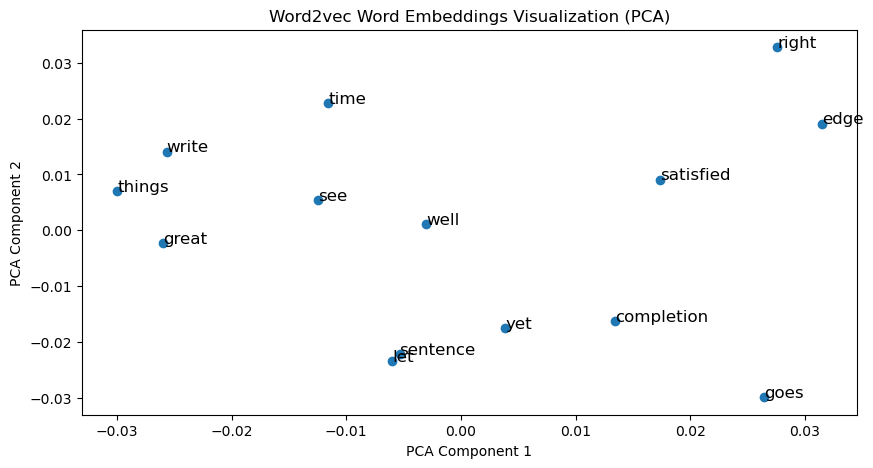

In [8]:
# Get all word vectors
all_words = list(word_vectors.index_to_key)
all_word_vectors = [word_vectors[word] for word in all_words]

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(all_word_vectors)

# Reduce dimensionality using t-SNE (optional, requires more computation)
# tsne = TSNE(n_components=2, random_state=42)
# word_vectors_tsne = tsne.fit_transform(all_word_vectors)

# Create a DataFrame for the PCA result
df_pca = pd.DataFrame(word_vectors_pca, index=all_words, columns=['x', 'y'])

# Plot PCA result
plt.figure(figsize=(10, 5))
plt.scatter(df_pca['x'], df_pca['y'])

# Annotate points
for word, pos in df_pca.iterrows():
    plt.annotate(word, pos, fontsize=12)
    
plt.title("Word2vec Word Embeddings Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
